# SNIDdataset and SNIDsn Tutorial

In [1]:
import SNIDsn
import SNIDdataset
import numpy as np

## SNIDsn

SNIDsn is a Python class that loads the .lnw template files from SNID. An instance has the following fields:

header -- A dictionary containing information about the template.

continuum -- A numpy array containing the removed continuum.

phases -- A numpy array of the phases observed in the template.

phaseType -- 0 for phases measured relative to Vmax, 1 for date of discovery.

wavelengths -- A numpy array with the wavelengths for the observed spectra.

data -- A structured numpy array containing the spectra. Check dtype.names for column names.

type -- A string giving the type of the object in the template.

subtype -- A string giving the subtype (if any) of the object in the template.

In [2]:
sn04gt = SNIDsn.SNIDsn()

In [3]:
sn04gt.loadSNIDlnw('test/sn2004gt.lnw')

In [4]:
sn04gt.header

{'Nbins': 1024,
 'Nspec': 13,
 'SN': 'sn2004gt',
 'SplineKnots': 10,
 'SubTypeInt': 2,
 'TypeInt': 3,
 'TypeStr': 'Ic-norm',
 'WvlEnd': 10000.0,
 'WvlStart': 2500.0,
 'dm15': -9.99}

In [5]:
sn04gt.phases

array([ 16.4,  18.4,  19.4,  22.4,  43.3,  48.2,  70.1,  81.1, 100. ,
       131.8, 141.7, 167.6, 186.5])

Get column names for spectra structured array

In [6]:
print sn04gt.data.dtype.names
print sn04gt.getSNCols()

('Ph16.4', 'Ph18.4', 'Ph19.4', 'Ph22.4', 'Ph43.3', 'Ph48.2', 'Ph70.1', 'Ph81.1', 'Ph100.0', 'Ph131.8', 'Ph141.7', 'Ph167.6', 'Ph186.5')
('Ph16.4', 'Ph18.4', 'Ph19.4', 'Ph22.4', 'Ph43.3', 'Ph48.2', 'Ph70.1', 'Ph81.1', 'Ph100.0', 'Ph131.8', 'Ph141.7', 'Ph167.6', 'Ph186.5')


Use column names to get spectra at specific phases:

In [7]:
spec = sn04gt.data['Ph16.4']
print spec

[0. 0. 0. ... 0. 0. 0.]


Filter wavelengths to a certain range, and filter the spectra.

In [8]:
sn04gt.wavelengthFilter(wvlmin=4000, wvlmax=7000)
print sn04gt.wavelengths.shape
print sn04gt.data.shape

(414,)
(414,)


Replace 0.0 placeholder value used by SNID with np.nan

In [9]:
sn04gt.snidNAN()

Remove columns from the spectra matrix.

In [10]:
sn04gt.removeSpecCol('Ph167.6')

In [11]:
sn04gt.phases

array([ 16.4,  18.4,  19.4,  22.4,  43.3,  48.2,  70.1,  81.1, 100. ,
       131.8, 141.7, 186.5])

Find the wavelength ranges of NaN gaps in a spectrum.

In [11]:
sn04gt.findGaps('Ph19.4')

[(6031.16, 6031.16), (6298.19, 6298.19), (6766.7, 6766.7)]

Find the interpolation range if a small gap intersects with an end.

In [12]:
sn04gt.getInterpRange(minwvl=4996.62, maxwvl=6006.72, phase='Ph19.4')

(4996.62, 6006.72)

Interpolate over gaps in a spectrum.

In [13]:
f = sn04gt.interp1dSpec('Ph16.4', 4000, 7000, True)

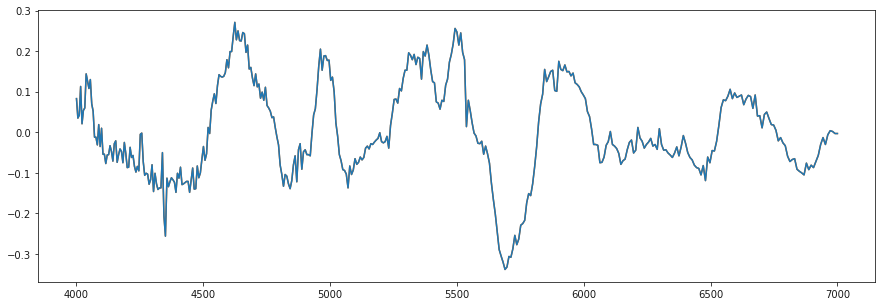

In [14]:
f

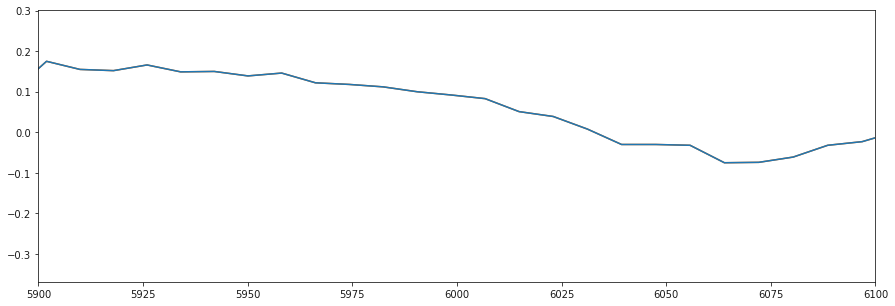

In [15]:
a = f.axes[0]
a.set_xlim((5900, 6100))
f

In [16]:
sn04gt.header['TypeStr']

'Ic-norm'

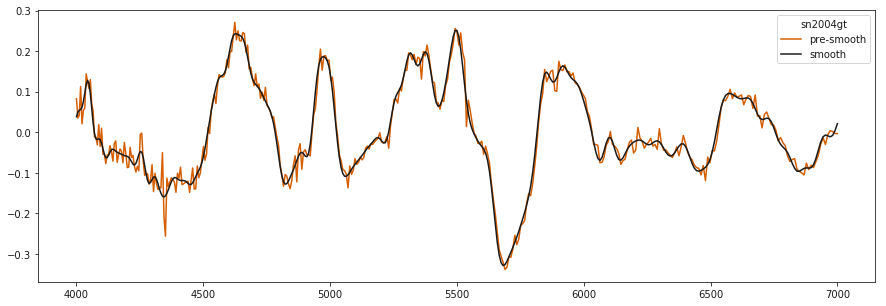

In [17]:
sn04gt.smoothSpectrum('Ph16.4', velcut=1000, plot=True)

You can save your SNIDsn object using pickle (it automatically names the pickle file and puts it in the directory you specify.):

In [8]:
sn04gt.save('test/')

## SNIDdataset

For many applications, you will want to load many SNID templates and easily work with them in a dataset. This module facilitates your work by creating a dictionary of SNIDsn objects. 

Load the templates specified in snlist, located in the directory specified by pathdir.

In [5]:
SNIDset = SNIDdataset.loadDataset(pathdir='test/', snlist='snlist.txt')

In [6]:
SNIDset.keys()

['sn1997ef',
 'sn1998dt',
 'sn2008ax',
 'sn2004dk',
 'sn2011ei',
 'sn2007Y',
 'sn2011fu',
 'sn2004gt',
 'sn2010ay',
 'sn2004gq']

Get the type breakdown of your dataset:

In [7]:
typedict = SNIDdataset.datasetTypeDict(SNIDset)

In [8]:
typedict

{'IIb': array(['sn2008ax', 'sn2011ei', 'sn2011fu'], dtype='|S8'),
 'Ib': array(['sn1998dt', 'sn2004dk', 'sn2007Y', 'sn2004gq'], dtype='|S8'),
 'Ic': array(['sn2004gt'], dtype='|S8'),
 'IcBL': array(['sn1997ef', 'sn2010ay'], dtype='|S8')}

Use the type dictionary to create subsets of your dataset:

In [9]:
IIb_dataset = SNIDdataset.subset(SNIDset, typedict['IIb'])

In [10]:
IIb_dataset.keys()

['sn2011fu', 'sn2008ax', 'sn2011ei']

Replace all SNIDsn objects 0.0 values with NaN.

In [11]:
SNIDdataset.snidsetNAN(SNIDset)

Interpolate all small gaps in all spectra of all SNIDsn objects.

In [12]:
SNIDdataset.interpGaps(SNIDset, 4000, 7000, 20)

Specify common wavelength range for dataset.

In [13]:
SNIDdataset.datasetWavelengthRange(SNIDset, 4000, 7000)

Smooth all spectra of all SNIDsn objects.

In [14]:
SNIDdataset.smoothSpectra(SNIDset, velcut=1000, velcutIcBL=3000, plot=False)

Visualize dataset

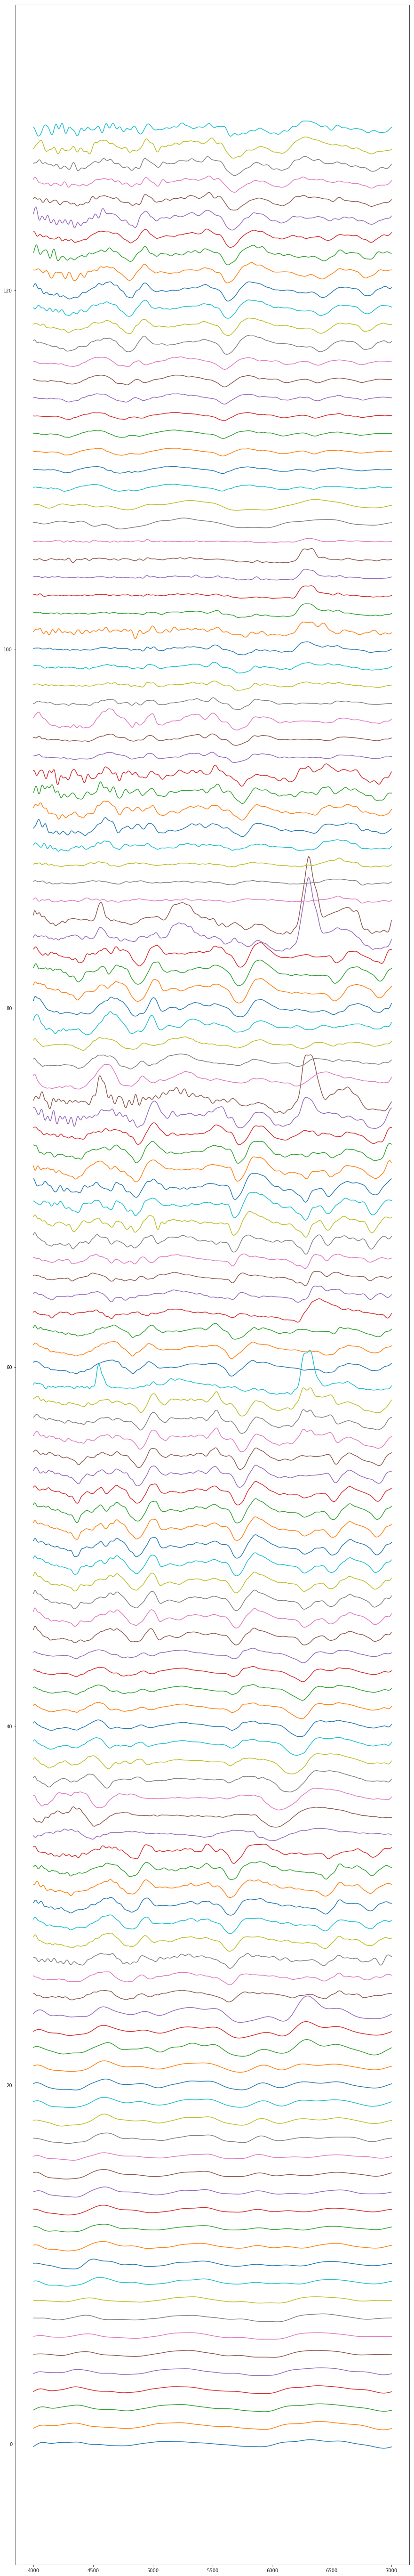

In [15]:
SNIDdataset.plotDataset(SNIDset, (15,100))

Get phase info for all SNIDsn in the dataset

In [16]:
SNIDdataset.datasetPhaseDict(SNIDset)

{'sn1997ef': array([-13.9, -11.8, -10.9, -10. ,  -9.1,  -6.1,  -5.1,  -5. ,  -4.1,
         12.8,  13.8,  15.7,  16.8,  18.6,  19.6,  21.6,  26.5,  40.3,
         44.3,  46.2,  48.1,  48.4,  75. ,  79.8, 104.8]),
 'sn1998dt': array([ 1.8,  2.8,  5.7,  8.7,  9.7, 12.6, 13.6, 18.5, 33.8]),
 'sn2004dk': array([14.2, 17.2, 46.1]),
 'sn2004gq': array([-9. , -8.1, -7.1, -6.1, -5.1, -2.1, -1.1, -0.1, 15.8, 16.8, 17.8,
        20.8, 20.8, 24.7, 41.6, 54.6, 69.5, 72.5, 78.4, 84.4, 89.3]),
 'sn2004gt': array([ 16.4,  18.4,  19.4,  22.4,  43.3,  48.2,  70.1,  81.1, 100. ,
        131.8, 141.7, 167.6, 186.5]),
 'sn2007Y': array([-15. ,  -9. ,  -2. ,   4.9,   7.9,  12.8,  19.8,  37.7, 197.3,
        267.8]),
 'sn2008ax': array([-20. , -19. , -18. , -16. , -15. , -13. , -12. , -11. , -10. ,
         -9. ,  -8. ,   6. ,   8. ,   9. ,   9. ,  12. ,  15. ,  16. ,
         19. ,  23. ,  37.9,  44.9,  66.9,  73.8,  79.8, 306.4]),
 'sn2010ay': array([15.7, 25.5]),
 'sn2011ei': array([-14., -10.,  -6.,  -4

Filter out phases

In [17]:
SNIDdataset.filterPhases(SNIDset, [(10,20)], False)

In [18]:
SNIDdataset.datasetPhaseDict(SNIDset)

{'sn1997ef': array([12.8, 13.8, 15.7, 16.8, 18.6, 19.6]),
 'sn1998dt': array([12.6, 13.6, 18.5]),
 'sn2004dk': array([14.2, 17.2]),
 'sn2004gq': array([15.8, 16.8, 17.8]),
 'sn2004gt': array([16.4, 18.4, 19.4]),
 'sn2007Y': array([12.8, 19.8]),
 'sn2008ax': array([12., 15., 16., 19.]),
 'sn2010ay': array([15.7]),
 'sn2011ei': array([13., 17.]),
 'sn2011fu': array([17., 19.])}

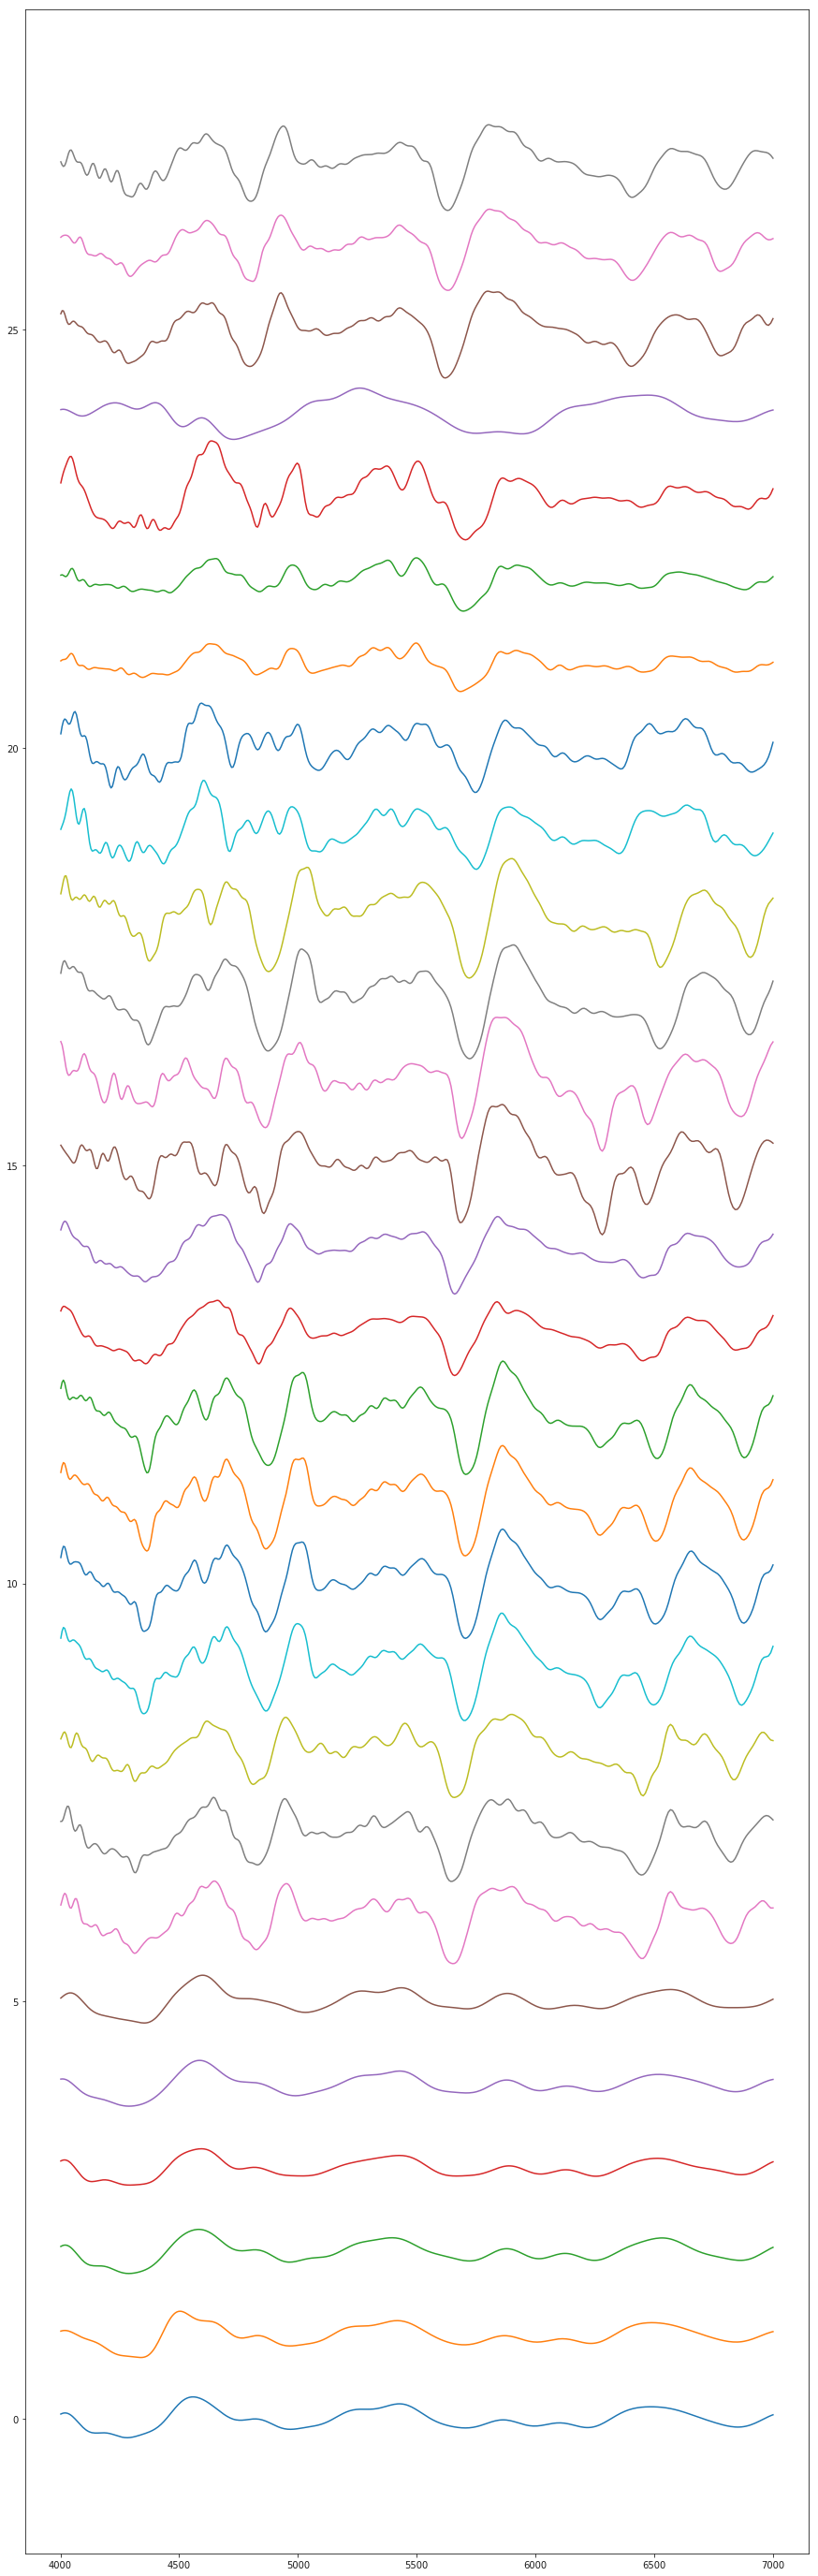

In [20]:
SNIDdataset.plotDataset(SNIDset, (15,50))